<a href="https://colab.research.google.com/github/fcousin59/Fred/blob/master/LC_correction_CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 2
Please execute the code below

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Data exploration

## Introduction
Display the first rows of the dataset.

In [0]:
# Your code here : 
df_music.head()

genre        artist_name  ... time_signature valence
0  Movie     Henri Salvador  ...            4/4   0.814
1  Movie  Martin & les fées  ...            4/4   0.816
2  Movie    Joseph Williams  ...            5/4   0.368
3  Movie     Henri Salvador  ...            4/4   0.227
4  Movie       Fabien Nataf  ...            4/4   0.390

[5 rows x 18 columns]

Describe the dataset including all types of columns (i.e. numerical and the others) and comment the column popularity.

In [0]:
# Your code here : 
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [0]:
df_music.describe(include = 'all')

genre     artist_name  ... time_signature        valence
count   232725          232725  ...         232725  232725.000000
unique      27           14564  ...              5            NaN
top     Comedy  Giuseppe Verdi  ...            4/4            NaN
freq      9681            1394  ...         200760            NaN
mean       NaN             NaN  ...            NaN       0.454917
std        NaN             NaN  ...            NaN       0.260065
min        NaN             NaN  ...            NaN       0.000000
25%        NaN             NaN  ...            NaN       0.237000
50%        NaN             NaN  ...            NaN       0.444000
75%        NaN             NaN  ...            NaN       0.660000
max        NaN             NaN  ...            NaN       1.000000

[11 rows x 18 columns]



```
# popularity:
- mean: 41.127502	
- std: 18.189948
- min: 0.000000
- max: 100.000000
```



Please check the presense / absence of missing values in each column and comment your result.

In [0]:
# Your code here : 
df_music.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

`Pas de valeurs nulles.`

## Some insights about the artists
Give the number of tracks for each artist. The result will be sorted by descending order for a better readability.

In [0]:
# Your code here : 
df_music.groupby('artist_name').count()[['track_name']].sort_values(['track_name'], ascending=False)

track_name
artist_name                       
Giuseppe Verdi                1394
Giacomo Puccini               1137
Kimbo Children's Music         971
Nobuo Uematsu                  825
Richard Wagner                 804
...                            ...
Melanie De Biasio                1
Mel Tillis                       1
Mel Levin                        1
Meiko                            1
정진우                              1

[14564 rows x 1 columns]


Give the mean of popularity for each artist. The result will be sorted by descending order for a better readability.
In addition, who are the 3 most popular artists ?

In [0]:
pd.DataFrame(df_music.groupby('artist_name')['popularity'].mean()).sort_values(["popularity"], ascending=False).head(3)

popularity
artist_name               
Pedro Capó            87.0
Mario Bautista        85.0
Mau y Ricky           83.0

For the genre 'Pop' only, give the mean of popularity for each artist. The result will be sorted by descending order for a better readability.
In addition, who are the 3 most popular artists ?

In [0]:
pd.DataFrame(df_music[df_music['genre']=='Pop'].groupby(['artist_name'])['popularity'].mean()).sort_values(["popularity"], ascending=False)

popularity
artist_name               
Mabel            91.000000
Pedro Capó       87.000000
ChocQuibTown     86.000000
Mario Bautista   85.000000
Tropkillaz       85.000000
...                    ...
Lucius           54.000000
Lisa Hannigan    54.000000
Ava Max          48.090909
Grey             31.500000
Melendi           3.000000

[1999 rows x 1 columns]

## What about Queen ?
Give the track names of Queen ?

In [0]:
# Your code here : 
df_music[df_music["artist_name"] == "Queen"][['artist_name','track_name']]

What are the popularity of all songs from the Queen band ?

What are the 3 most popular ?

In [0]:
# Your code here : 
pd.DataFrame(df_music[df_music["artist_name"] == "Queen"][['artist_name','track_name','popularity']])\
        .sort_values(["popularity"], ascending=False).head(3)

artist_name                           track_name  popularity
166058       Queen  Bohemian Rhapsody - Remastered 2011          82
166059       Queen       Don't Stop Me Now - Remastered          81
166069       Queen   Somebody To Love - Remastered 2011          77

## What about Kanye West ?
Give the track names of Kanye West ?

What are the 3 most popular ?

In [0]:
# Your code here : 
df_music[df_music["artist_name"] == "Kanye West"][['artist_name','track_name']]

artist_name              track_name
87006   Kanye West  I Love It (& Lil Pump)
87106   Kanye West             Gold Digger
87120   Kanye West                All Mine
87126   Kanye West                Stronger
87154   Kanye West               Heartless
...            ...                     ...
150921  Kanye West           Street Lights
150942  Kanye West          Hell Of A Life
151640  Kanye West               The Glory
151971  Kanye West              Low Lights
151997  Kanye West              Drive Slow

[188 rows x 2 columns]

## Transform
Create a new column 'nb_words', with the number of words in each title (track names). It's up to you to choose if punctuation is a word or not.

In [0]:
# Your code here : 
df_music['nb_words_track_name'] = df_music['track_name'].apply(lambda x: len(x.split()))
df_music.head(3)

## Pivot table
Let's do a pivot table with genre in lines, key in columns and number of songs in values.

In [0]:
# Your code here : 
df_music.pivot_table(index='genre', columns='key', values='track_name', aggfunc='count')

## Correlation matrix
Give the correlation matrix for a full understanding of our dataset.

In [0]:
df_music.corr()

popularity  acousticness  ...   valence  nb_words_track_name
popularity             1.000000     -0.381295  ...  0.060076            -0.226041
acousticness          -0.381295      1.000000  ... -0.325798             0.297207
danceability           0.256564     -0.364546  ...  0.547154            -0.229582
duration_ms            0.002348      0.011203  ... -0.141811             0.108421
energy                 0.248922     -0.725576  ...  0.436771            -0.287224
instrumentalness      -0.210983      0.316154  ... -0.307522             0.119395
liveness              -0.167995      0.069004  ...  0.011804             0.044689
loudness               0.363011     -0.690202  ...  0.399901            -0.338822
speechiness           -0.151076      0.150935  ...  0.023842            -0.047410
tempo                  0.081039     -0.238247  ...  0.134857            -0.086280
valence                0.060076     -0.325798  ...  1.000000            -0.125752
nb_words_track_name   -0.226041      0.297207  ... -0.125752             1.000000

[12 rows x 12 columns]

# Dataviz

## Remember, each chart must have :
- beautiful colors
- title
- readable axis ticks
- legend

## Display a correlation heatmap.
Color scale has to be center on 0-value, in order to distinguish negative and positive values. Please choose a beautiful palette, and remember to display a title.


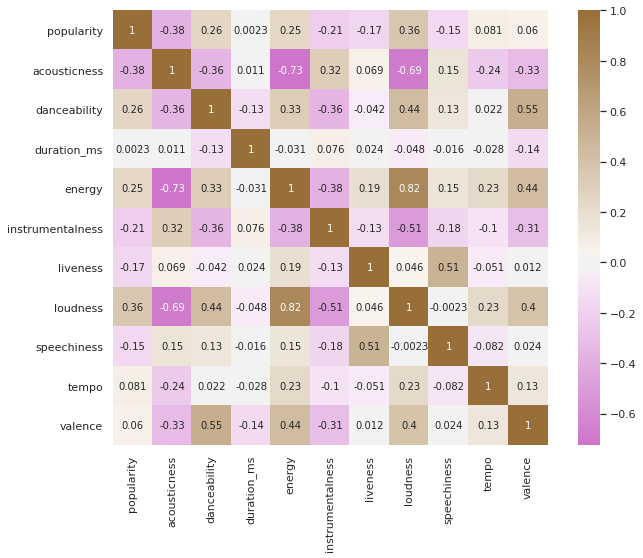

In [0]:
# Your code here : 
f, ax = plt.subplots(figsize=(11, 8))
cmap = sns.diverging_palette(-50, 50, as_cmap=True)
ax = sns.heatmap(df_music.corr(), annot=True, cmap=cmap, center=0, square=True)
plt.show()

Some columns seems to have a strong (negative) correlations. 
- Which ones ? 
- What does it means ?

In [0]:
# Your answers here :

'''acousticness est négativement corrélée avec loudness et energy'''

'acousticness est négativement corrélée avec loudness et energy'

## Find the correlation coefficient between Energy and Acousticness

In [0]:
# Your code here :
df_music['energy'].corr(df_music['acousticness'])

-0.7255763647090525

## Pairplot
Only for genres Opera and Reggaeton, display a pairplot which different colors for genres (so you'll have 2 colors).

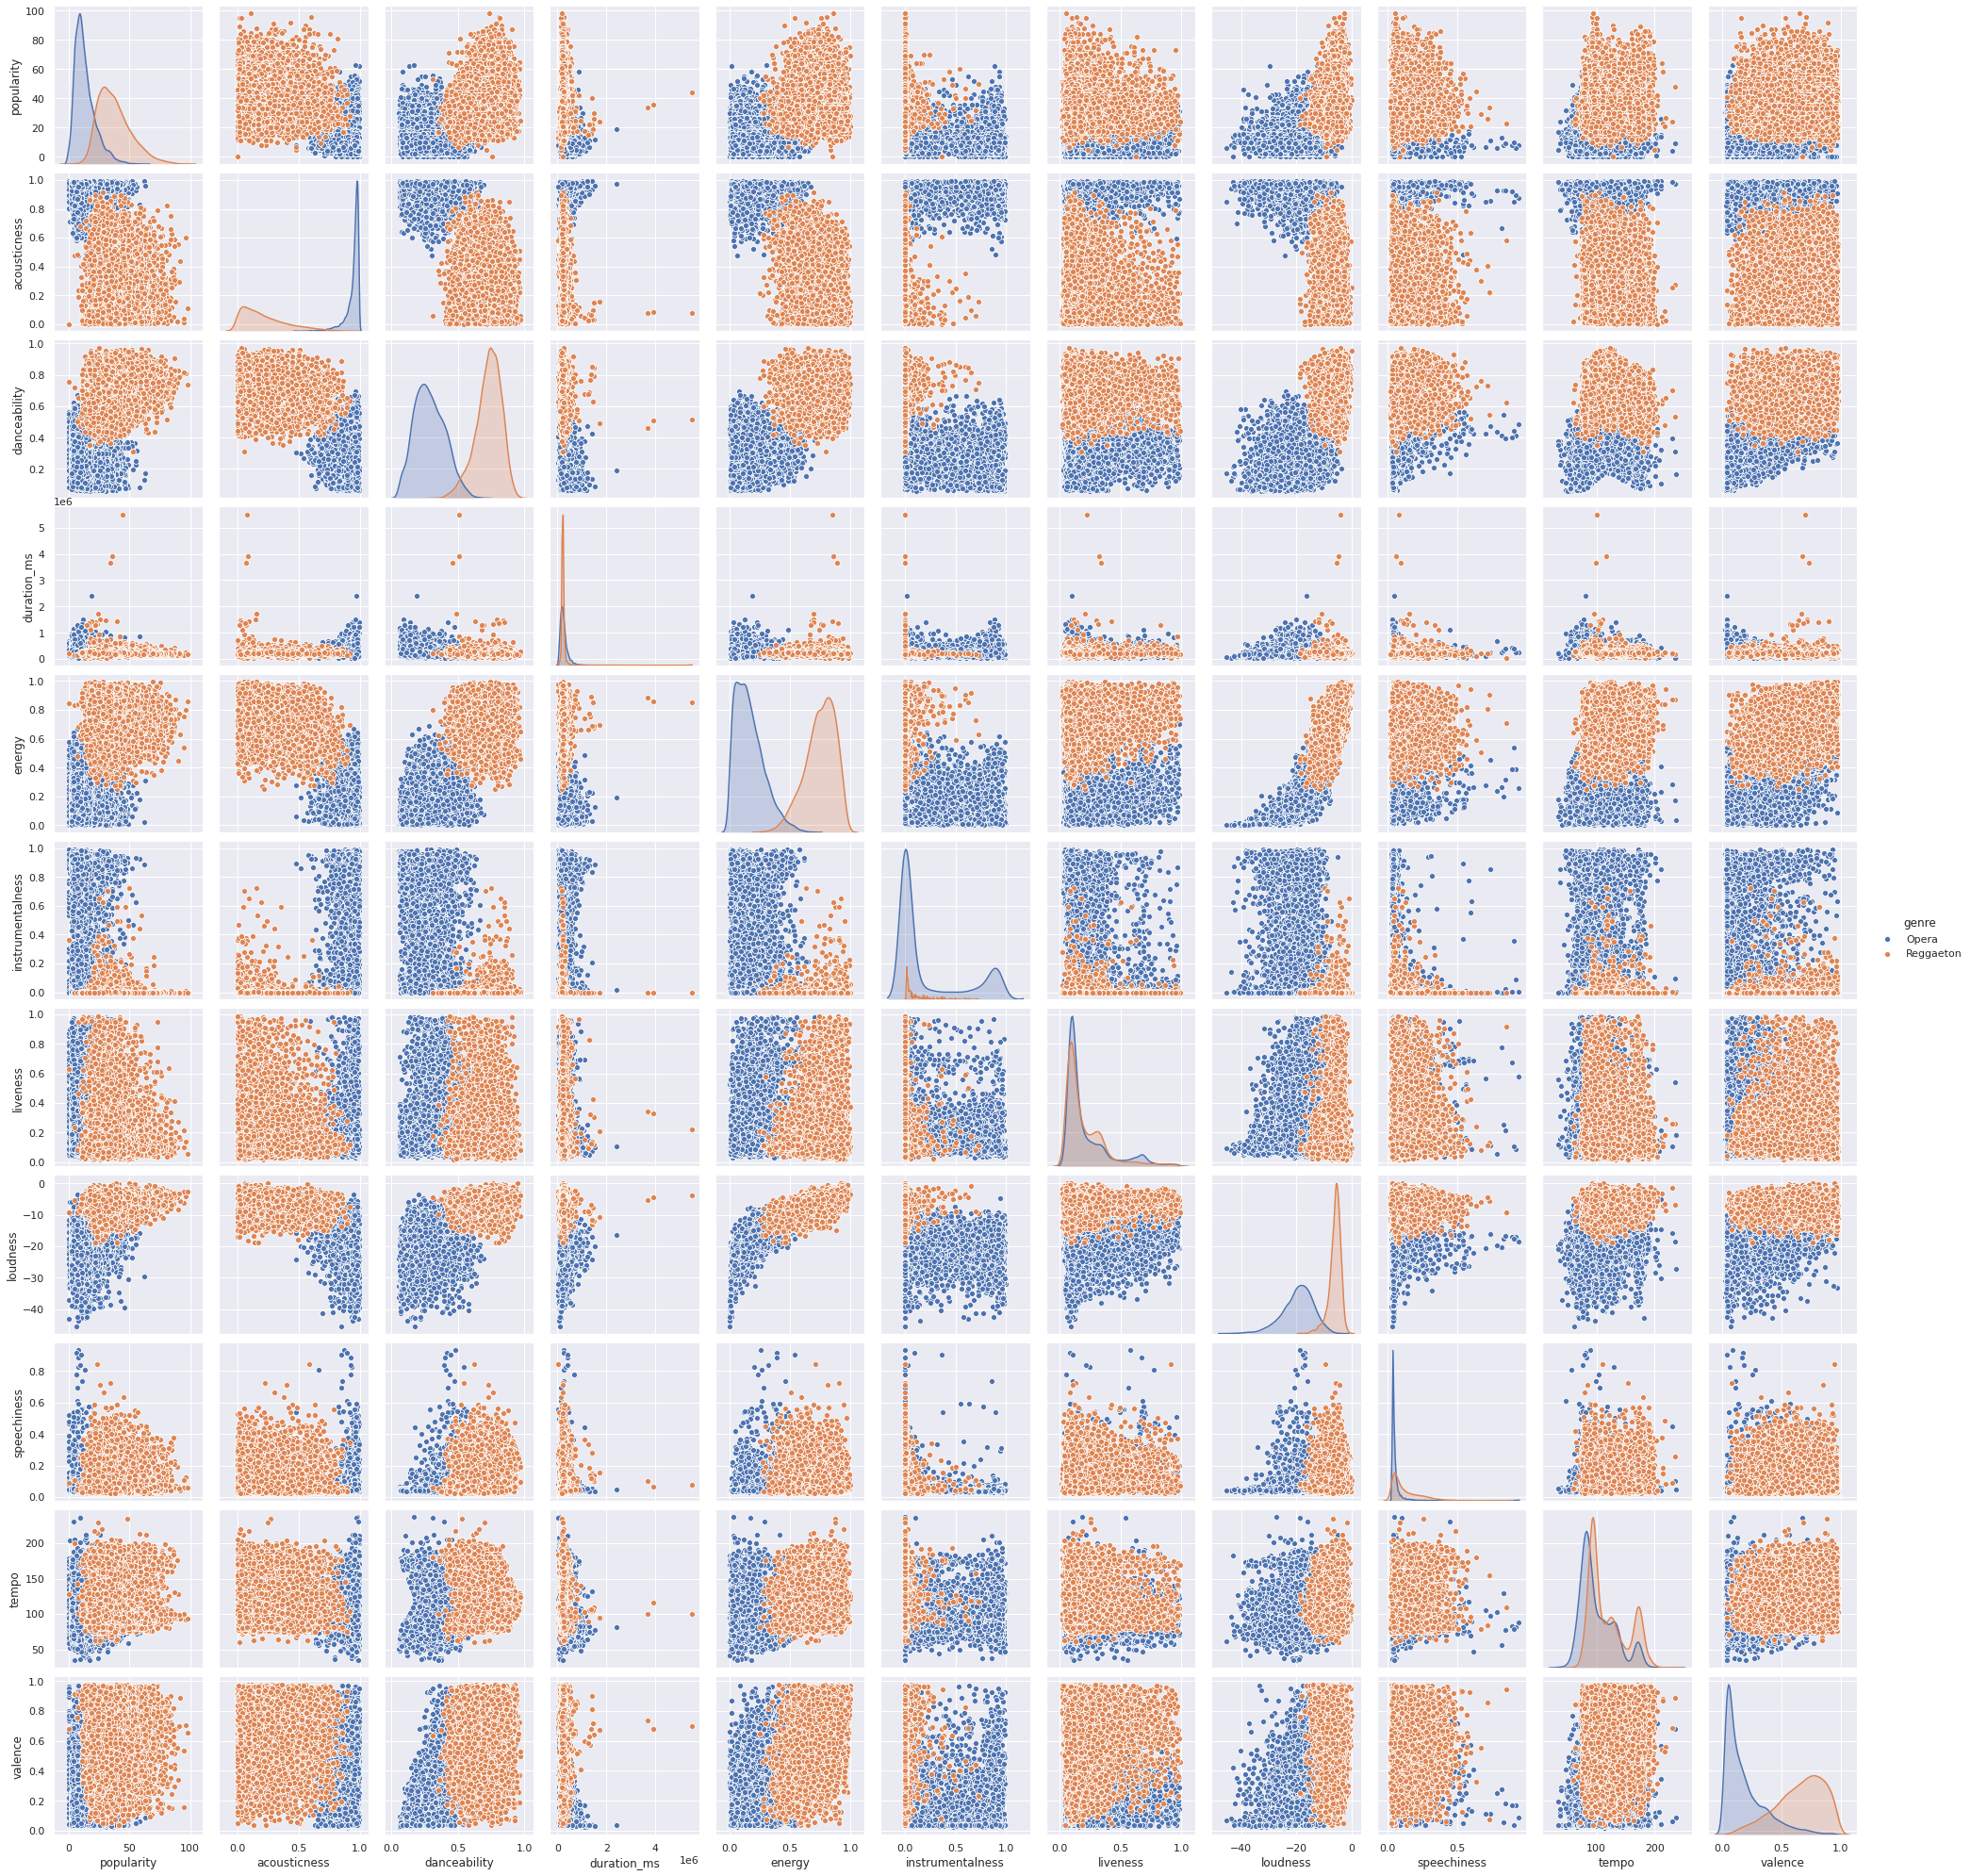

In [0]:
# Your code here :

g = sns.pairplot(df_music[df_music['genre'].isin(['Opera', 'Reggaeton'])], hue="genre")

## Scatterplot
Draw a scatterplot on the columns of your choice:
- Filter only on genres Opera and Reggaeton
- Differents colors for genres
- Please choose beautiful colors, and remember to display a title.

In [0]:
df_music['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

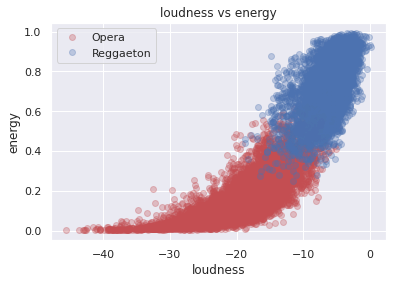

In [0]:
# Scatterplot
plt.plot(df_music[df_music['genre'] == 'Opera']['loudness'], df_music[df_music['genre'] == 'Opera']['energy'],\
         marker = 'o', linestyle = 'None', alpha = 0.3, color = 'r', label = 'Opera')
plt.plot(df_music[df_music['genre'] == 'Reggaeton']['loudness'], df_music[df_music['genre'] == 'Reggaeton']['energy'],\
         marker = 'o', linestyle = 'None', alpha = 0.3, color = 'b', label = 'Reggaeton')
plt.xlabel('loudness')
plt.ylabel('energy')
plt.title('loudness vs energy')
plt.legend()
plt.show()

## Boxplot
Draw on the same figure 2 boxplots : 1 by genre.
- Boxplots have to be in vertical
- Filter only on genres Opera and Reggaeton
- Your boxplots represent danceability


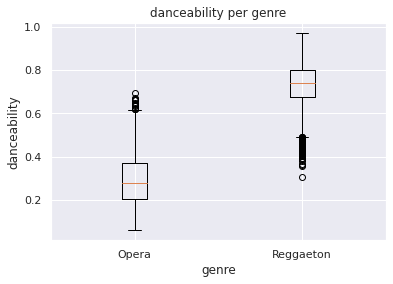

In [0]:
# Your code here :
donnees_a_representer = []
for genre in ['Opera', 'Reggaeton']:
  donnees_a_representer.append((df_music[df_music['genre'] == genre].danceability).tolist())

plt.figure(figsize =(6, 4))
plt.boxplot(donnees_a_representer, labels = ['Opera', 'Reggaeton'])
plt.xlabel('genre')
plt.ylabel('danceability')
plt.title('danceability per genre')
plt.show()

How do we read it ?
- What does the horizontal line near the red arrow represent?

In [0]:
# Your answer here :

'''troisième  quartile'''

'troisième  quartile'

## Histogram
Draw a histogram for the distribution of "energy", only for the genre 'Country'

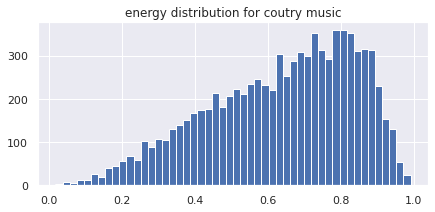

In [0]:
# Your code here :
plt.figure(figsize = (7,3))
plt.hist(df_music[df_music['genre'] == 'Country']['energy'], bins = 50)
plt.title('energy distribution for coutry music')
plt.show()

## Comparison between the top 1% popularity and the total dataset
Find a way to compare songs with highest popularity and the others. Something like this example, but you could be creative.

Here we've compared the frequencies by genre (35% of top-songs are "pop", versus 4% of pop songs in the total dataset)


In [0]:
# frequency of genres for all songs

df_frequency = df_music[['genre', 'popularity']].groupby(['genre']).count()/len(df_music)
df_frequency.reset_index(inplace = True)
df_frequency.rename(columns={"genre": "genre", "popularity": "cnt"}, inplace = True)

df_frequency.head()

genre       cnt
0         A Capella  0.000511
1       Alternative  0.039802
2             Anime  0.038397
3             Blues  0.038771
4  Children's Music  0.023216

In [0]:
# frequency of genres for top 1% songs
df_1percent = df_music[['genre', 'popularity']].sort_values(by='popularity', ascending = False).head(int(len(df_music)*0.01)).\
      groupby('genre').count()/int(len(df_music)*0.01)
      
df_1percent.reset_index(inplace = True)
df_1percent.rename(columns={"genre": "genre", "popularity": "cnt1percent"}, inplace = True)
df_1percent.head()

genre  cnt1percent
0       Alternative     0.005157
1             Blues     0.000430
2  Children’s Music     0.025355
3           Country     0.008595
4             Dance     0.127202

In [0]:
df_ratio_final = df_frequency.merge(df_1percent, left_on='genre', right_on='genre', how='left').fillna(0)
df_ratio_final.sort_values(by='cnt1percent', inplace=True, ascending=False)
df_ratio_final.head()

genre       cnt  cnt1percent
17      Pop  0.040331     0.350236
19      Rap  0.039669     0.159003
9     Dance  0.037387     0.127202
12  Hip-Hop  0.039940     0.116459
22     Rock  0.039841     0.070907

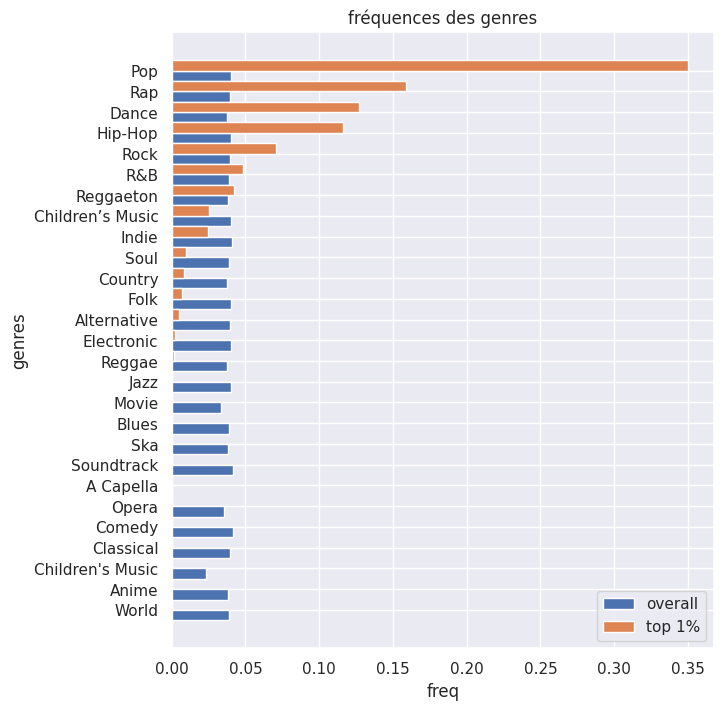

In [0]:
sns.set()

fig, ax = plt.subplots(figsize=(7, 8))

width = 0.5
genres = df_ratio_final['genre']
y_pos = np.arange(len(genres))
freq = df_ratio_final['cnt']
freq1 = df_ratio_final['cnt1percent']

ax.barh(y_pos + width/2, freq, width, align='center', label='overall')
ax.barh(y_pos - width/2, freq1, width, align='center', label = 'top 1%')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('freq')
ax.set_ylabel('genres')
ax.set_title('fréquences des genres')
ax.legend()

plt.show()

## Interactive chart
With plotly express, draw an interactive histogram on energy, with a strip by genre.

In [0]:
fig = px.histogram(df_music, x="energy", color="genre", nbins = 60)
fig.update_layout(
    title_text='histogram of Energy by genre ')
   
fig.show()

# Machine Learning : Regression
In this part we will try to predict the **"loudness"** of a track. 


## Univariate regression
First we will train a univariate linear regression model.

Find the most correlated column.

In [0]:
# Your code here :



Split your dataset into a train and test set (using 80% as train and 20% as test). 

Use a `random_state` of **1** (for reproductivity sake).

In [0]:
# Your code here :

X = df_music[['energy']] 
y = df_music['loudness']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.80)

Now train your model on the train set.

In [0]:
# Your code here :

univariate_model = LinearRegression()
univariate_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

And evaluate it on the test set. If you did everything right your score should be `0.6689508695872618`.

In [0]:
score = univariate_model.score(X_test,y_test)
print("Score for the Test dataset : ", score)

Score for the Test dataset :  0.6689508695872618


Visualize your data with a scatter plot (different colors for the train and the test set).

Add a lineplot of the regression.

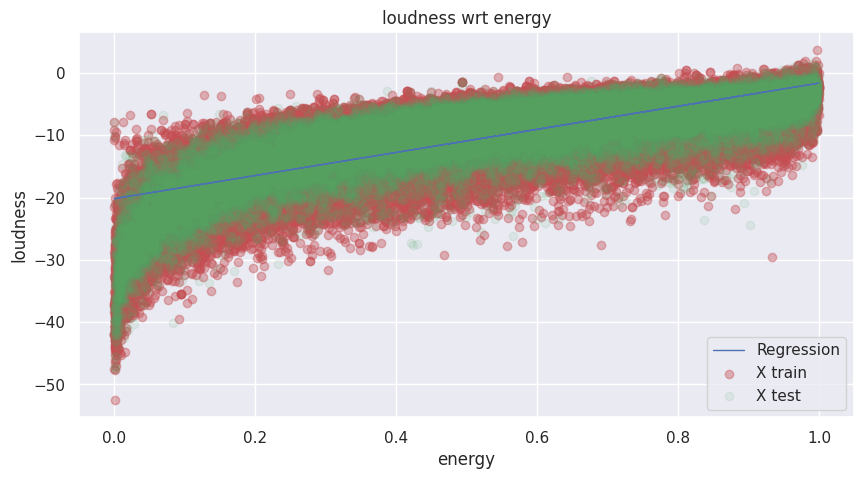

In [0]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X_train, y_train, color='r', label = 'X train', alpha = 0.4)
plt.scatter(X_test, y_test, color='g', label = 'X test',  alpha = 0.1)
plt.plot(X, univariate_model.predict(X), color="b", linewidth = 1, label = 'Regression')

plt.title('loudness wrt energy')
plt.xlabel('energy')
plt.ylabel('loudness')
plt.legend()

plt.show()

Print the equation of the regression.

In [0]:
# Replace a and b by the coefficients
print("a * x + b")

Use two different method to predict the "**loudness**" for a an energy of 0.62.

In [0]:
# Your code here :
print(univariate_model.predict([[0.62]]))
print(univariate_model.coef_ * 0.62 + univariate_model.intercept_ )

[-8.65957415]
[-8.65957415]


## Multivariate regression

Now you will predict the **loudness** of a track with all the others numericals columns.

You will do all the needed steps and keep a `random_state` of 1.

Your score should be : `0.7650705916016727`

In [0]:
columns =["acousticness", "danceability", "duration_ms", "energy",
          "instrumentalness", "liveness", "popularity", "speechiness", "tempo", "valence"]


X = df_music[columns] 
y = df_music['loudness']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.80)
lmreg = LinearRegression()
lmreg.fit(X_train, y_train)
score1 = lmreg.score(X_test, y_test)
print(score1)

0.7650705916016727


# Classification

Train a KNN-model that predict the genre of a track with wichever columns and means you want.

Try to get the best score!!!

In [0]:
my_columns = ['energy', 'popularity', 'instrumentalness', 'acousticness', 'liveness']
X = df_music[my_columns]
y = df_music['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.66)
model = KNeighborsClassifier(n_neighbors=25)
knn = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.2898884072440507
